Libraries:

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np

Reading features from csv file:

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/ML_Final_Project/features/feature_1.csv')
feature_1 = data.drop(['Filename'], axis=1)

data = pd.read_csv('/content/drive/MyDrive/ML_Final_Project/features/feature_2.csv')
feature_2 = data.drop(['Filename'], axis=1)

data = pd.read_csv('/content/drive/MyDrive/ML_Final_Project/features/feature_3.csv')
feature_3 = data.drop(['Filename'], axis=1)

data = pd.read_csv('/content/drive/MyDrive/ML_Final_Project/features/feature_4.csv')
feature_4 = data.drop(['Filename'], axis=1)

Scaling Data:

In [7]:
scaler = StandardScaler()
scaled_data_1 = scaler.fit_transform(feature_1)

scaled_data_2 = scaler.fit_transform(feature_2)

scaled_data_3 = scaler.fit_transform(feature_3)

scaled_data_4 = scaler.fit_transform(feature_4)

####Finding the right number of clusters using K-Means:
Silhouette Score:

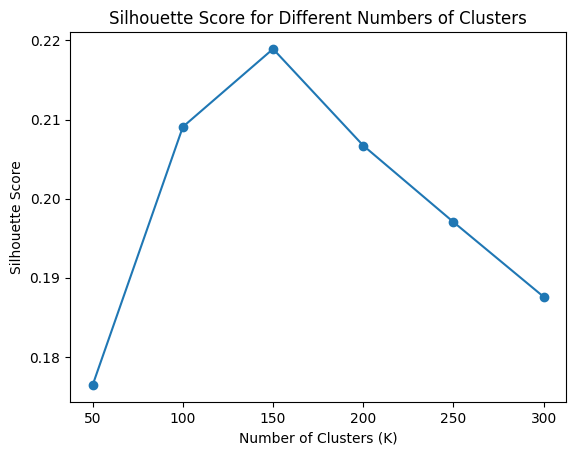

Optimal Number of Clusters: 150


In [8]:
min_clusters = 50
max_clusters = 300
cluster_range = range(min_clusters, max_clusters + 1,50)
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42,  n_init=10)
    clusters = kmeans.fit_predict(scaled_data_1)

    silhouette_avg = silhouette_score(scaled_data_1, clusters)
    silhouette_scores.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print("Optimal Number of Clusters:", optimal_clusters)

Hence We check between 100 and 200:

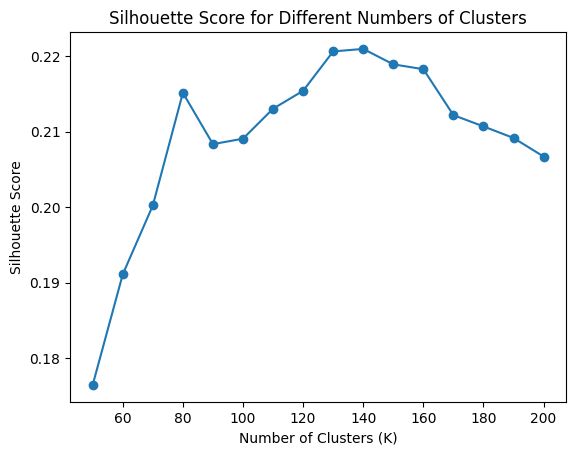

Optimal Number of Clusters: 140


In [9]:
_min_clusters = 100
max_clusters = 200
cluster_range = range(min_clusters, max_clusters + 1,10)

silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42,  n_init=10)
    clusters = kmeans.fit_predict(scaled_data_1)

    silhouette_avg = silhouette_score(scaled_data_1, clusters)
    silhouette_scores.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print("Optimal Number of Clusters:", optimal_clusters)

Now we check between 130 and 150:

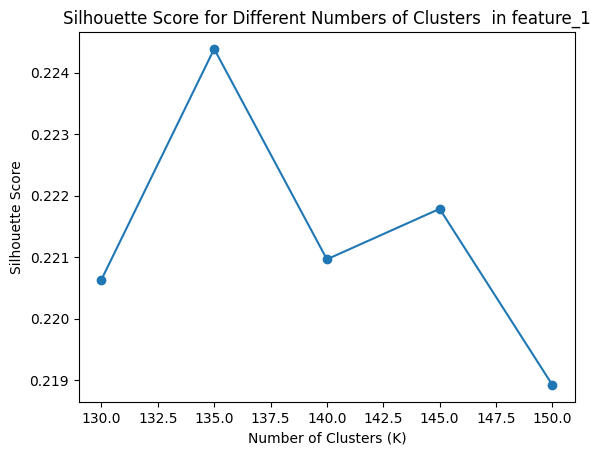

Optimal Number of Clusters in feature_1: 135


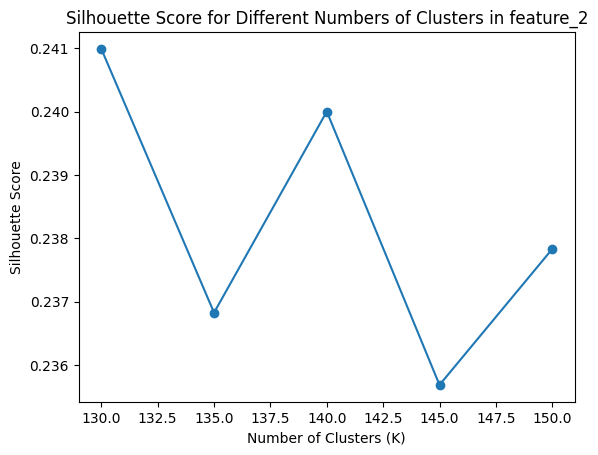

Optimal Number of Clusters in feature_2: 130


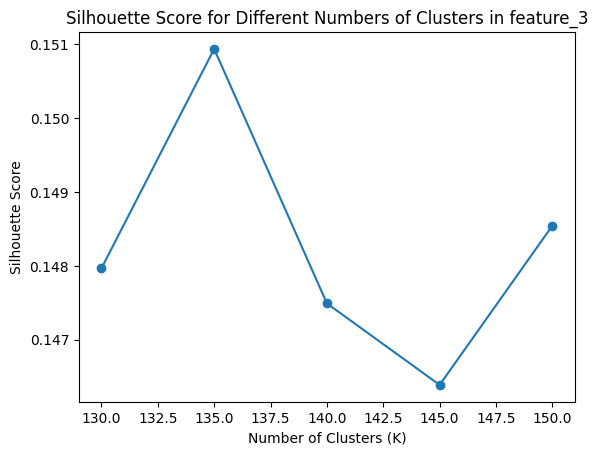

Optimal Number of Clusters in feature_3: 130


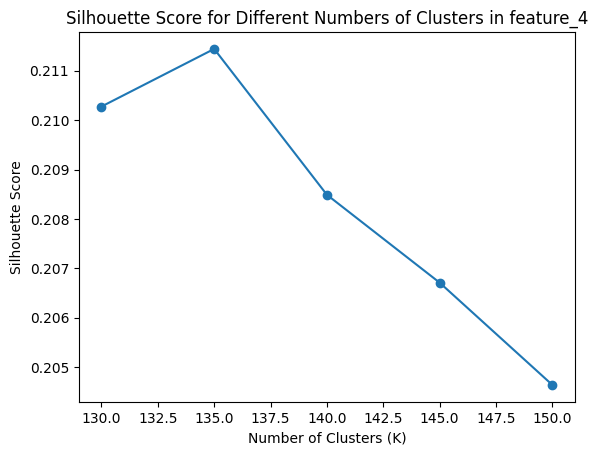

Optimal Number of Clusters in feature_4: 135


In [11]:
min_clusters = 130
max_clusters = 150
cluster_range = range(min_clusters, max_clusters + 1, 5)

silhouette_scores_1 = []
silhouette_scores_2 = []
silhouette_scores_3 = []
silhouette_scores_4 = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42,  n_init=10)

    clusters_1 = kmeans.fit_predict(scaled_data_1)
    clusters_2 = kmeans.fit_predict(scaled_data_2)
    clusters_3 = kmeans.fit_predict(scaled_data_3)
    clusters_4 = kmeans.fit_predict(scaled_data_4)

    silhouette_avg_1 = silhouette_score(scaled_data_1, clusters_1)
    silhouette_scores_1.append(silhouette_avg_1)

    silhouette_avg_2 = silhouette_score(scaled_data_2, clusters_2)
    silhouette_scores_2.append(silhouette_avg_2)

    silhouette_avg_3 = silhouette_score(scaled_data_3, clusters_3)
    silhouette_scores_3.append(silhouette_avg_3)

    silhouette_avg_4 = silhouette_score(scaled_data_4, clusters_4)
    silhouette_scores_4.append(silhouette_avg_4)

plt.plot(cluster_range, silhouette_scores_1, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters  in feature_1')
plt.show()

optimal_clusters_1 = cluster_range[silhouette_scores_1.index(max(silhouette_scores_1))]
print("Optimal Number of Clusters in feature_1:", optimal_clusters_1)



plt.plot(cluster_range, silhouette_scores_2, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters in feature_2')
plt.show()

optimal_clusters_2 = cluster_range[silhouette_scores_2.index(max(silhouette_scores_2))]
print("Optimal Number of Clusters in feature_2:", optimal_clusters_2)


plt.plot(cluster_range, silhouette_scores_3, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters in feature_3')
plt.show()

optimal_clusters_3 = cluster_range[silhouette_scores_2.index(max(silhouette_scores_2))]
print("Optimal Number of Clusters in feature_3:", optimal_clusters_3)

plt.plot(cluster_range, silhouette_scores_4, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters in feature_4')
plt.show()

optimal_clusters_4 = cluster_range[silhouette_scores_4.index(max(silhouette_scores_4))]
print("Optimal Number of Clusters in feature_4:", optimal_clusters_4)

From above we conculde that using feature_2 is the best option with 130 clusters.

Now Implementing K-means:

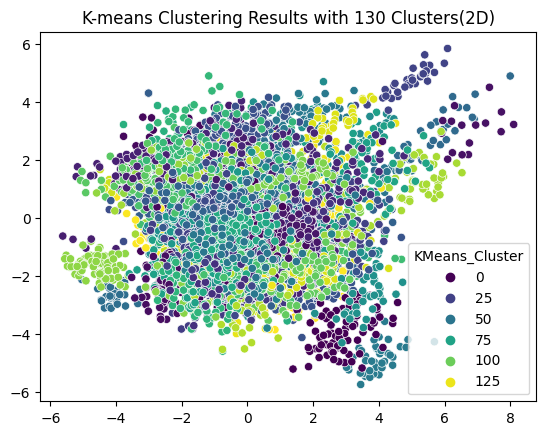

Silhouette Number: 0.24098781509224887


In [50]:
optimal_clusters = 130
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42,n_init = 10)
kmeans_clusters = kmeans.fit_predict(scaled_data_2)
Kmeans_plot = []
data['KMeans_Cluster'] = kmeans_clusters

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data_2)

sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue='KMeans_Cluster', data=data, palette='viridis')
plt.title('K-means Clustering Results with 130 Clusters(2D)')
plt.show()
silhouette = silhouette_score(scaled_data_2, kmeans_clusters)
print("Silhouette Number:",silhouette)
Kmeans_plot.append(silhouette)

####Other Clustering sizes:
50:

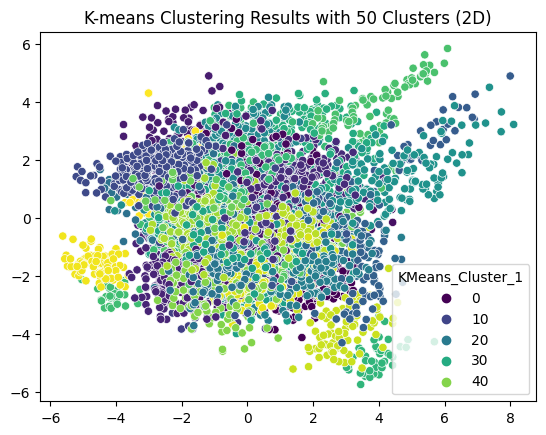

Silhouette Number: 0.19570585640915195


In [51]:
kmeans = KMeans(n_clusters=50, random_state=42,n_init = 10)
kmeans_clusters = kmeans.fit_predict(scaled_data_2)

data['KMeans_Cluster_1'] = kmeans_clusters

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data_2)

sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue='KMeans_Cluster_1', data=data, palette='viridis')
plt.title('K-means Clustering Results with 50 Clusters (2D)')
plt.show()
silhouette = silhouette_score(scaled_data_2, kmeans_clusters)
print("Silhouette Number:",silhouette)
Kmeans_plot.append(silhouette)

200:

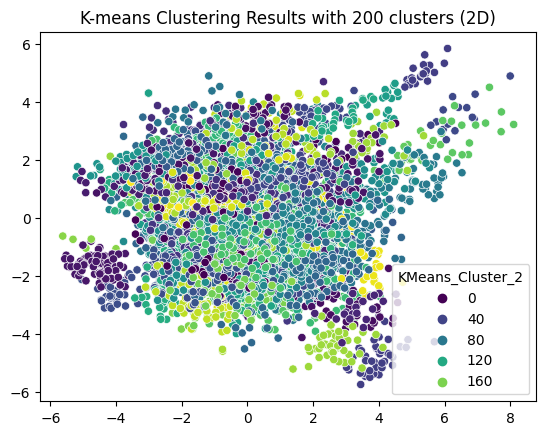

Silhouette Number: 0.22635402912324937


In [52]:
kmeans = KMeans(n_clusters=200, random_state=42,n_init = 10)
kmeans_clusters = kmeans.fit_predict(scaled_data_2)

data['KMeans_Cluster_2'] = kmeans_clusters

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data_2)

sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue='KMeans_Cluster_2', data=data, palette='viridis')
plt.title('K-means Clustering Results with 200 clusters (2D)')
plt.show()
silhouette = silhouette_score(scaled_data_2, kmeans_clusters)
Kmeans_plot.append(silhouette)
print("Silhouette Number:",silhouette)

Hierarchical Clustering:

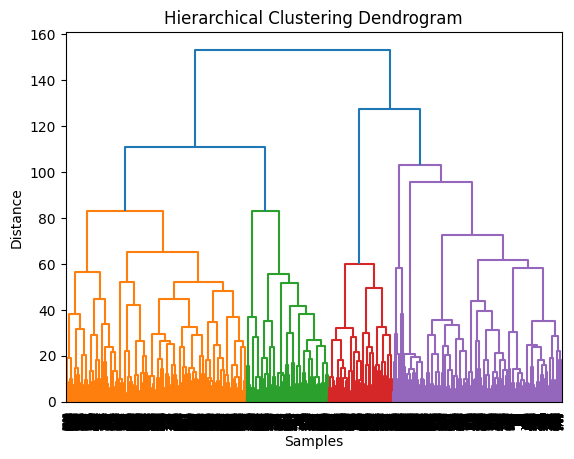

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [56]:
linkage_matrix = linkage(scaled_data_2, method='ward')

dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [54]:
num_clusters = 130
hierarchical_clusters = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', metric='euclidean')
hierarchical_labels = hierarchical_clusters.fit_predict(scaled_data_2)
hier_plot = []
data['Hierarchical_Cluster'] = hierarchical_labels

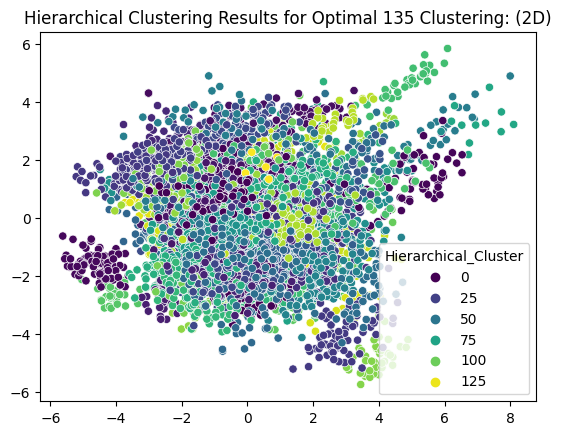

silhouette score: 0.20282619897739532


In [55]:
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue='Hierarchical_Cluster', data=data, palette='viridis')
plt.title('Hierarchical Clustering Results for Optimal 135 Clustering: (2D)')
plt.show()
silhouette_Hier= silhouette_score(scaled_data_1, hierarchical_labels)
print("silhouette score:",silhouette_Hier)
hier_plot.append(silhouette_Hier)

50 Clusters:

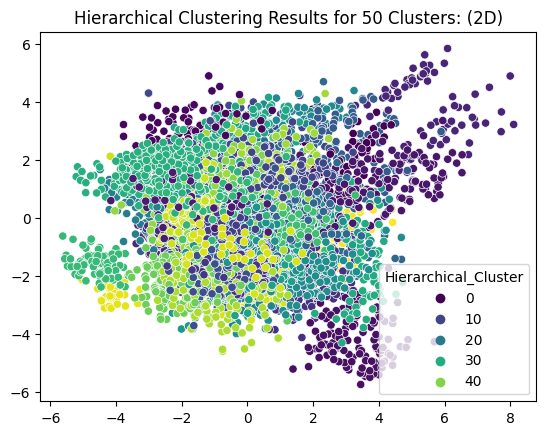

silhouette score: 0.1314053028138329


In [56]:
num_clusters = 50
hierarchical_clusters = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', metric='euclidean')
hierarchical_labels = hierarchical_clusters.fit_predict(scaled_data_2)

data['Hierarchical_Cluster'] = hierarchical_labels

sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue='Hierarchical_Cluster', data=data, palette='viridis')
plt.title('Hierarchical Clustering Results for 50 Clusters: (2D)')
plt.show()
silhouette_Hier= silhouette_score(scaled_data_1, hierarchical_labels)
print("silhouette score:",silhouette_Hier)
hier_plot.append(silhouette_Hier)

100 Clusters:

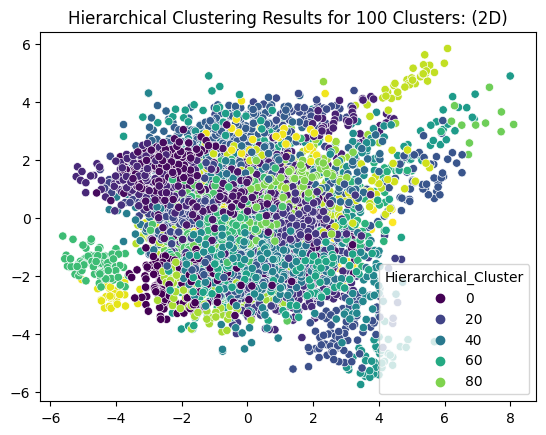

silhouette score: 0.18934477543127093


In [57]:
num_clusters = 100
hierarchical_clusters = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', metric='euclidean')
hierarchical_labels = hierarchical_clusters.fit_predict(scaled_data_2)

data['Hierarchical_Cluster'] = hierarchical_labels

sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue='Hierarchical_Cluster', data=data, palette='viridis')
plt.title('Hierarchical Clustering Results for 100 Clusters: (2D)')
plt.show()
silhouette_Hier= silhouette_score(scaled_data_1, hierarchical_labels)
print("silhouette score:",silhouette_Hier)
hier_plot.append(silhouette_Hier)

Plot:

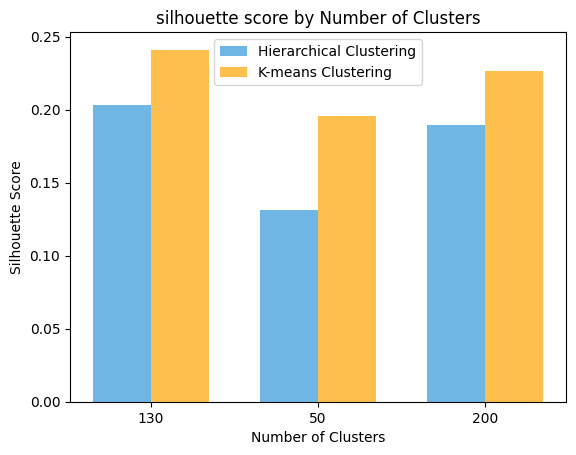

In [67]:
labels = ['130', '50', '200']

bar_width = 0.35

x_positions = np.arange(len(labels))

plt.bar(x_positions - bar_width/2, hier_plot, label='Hierarchical Clustering', color='#3498db', width=bar_width, alpha=0.7)
plt.bar(x_positions + bar_width/2, Kmeans_plot, label='K-means Clustering', color='#ffa500', width=bar_width, alpha=0.7)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('silhouette score by Number of Clusters')

plt.legend()
plt.xticks(x_positions, labels)
plt.show()
